## Map Search

In [1]:
# Set Cities
city = 'BEIJING CHANGCHUN MULUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK'
BEIJING, CHANGCHUN, MULUMUQI, WUHAN, GUANGZHOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = city.split()

In [2]:
# Set connections
connection = {
    CHANGCHUN: [BEIJING],
    MULUMUQI: [BEIJING], 
    BEIJING: [MULUMUQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    # To keep consistence, add SHENZHEN
    WUHAN: [SHANGHAI, BEIJING, GUANGZHOU, SHENZHEN],
    GUANGZHOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUANGZHOU]
}

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

/Users/ryne/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


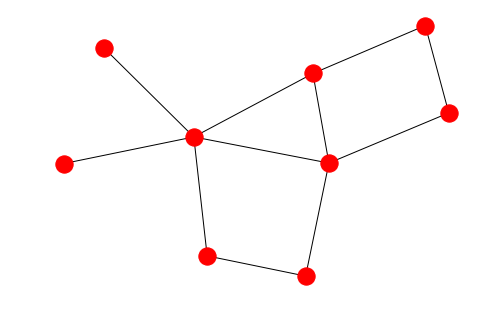

In [4]:
graph = connection
g = nx.Graph(graph)
nx.draw(g)
plt.show()

In [5]:
def nagivator(start, destination, connection):
    pathes = [[start]]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        
        if frontier in seen: continue
        
        successors = connection[frontier]
        
        for s in successors:
            if s == destination:
                path.append(s)
                return path
            else:
                pathes.append(path + [s])
                
        # This statment is useless  
        # pathes = sorted(pathes, key=len)
        
        seen.add(frontier)

In [6]:
# test
nagivator(MULUMUQI, BANGKOK, connection)

['MULUMUQI', 'BEIJING', 'SHENZHEN', 'BANGKOK']

In [7]:
# test detail
start = BEIJING
destination = GUANGZHOU

seen = set()
pathes = [[start]]
path = pathes.pop(0)

print('init path:', path)
print('init pathes:', pathes)
print('-----------------------')

frontier = path[-1]
print('frontier:', frontier)
print('-----------------------')

if frontier in seen:
    print('Continue!')
    print('-----------------------')


successors = connection[frontier]
print('successors:', successors)
print('-----------------------')


for s in successors:
    if s == destination: 
        path.append(s)
        print('return path:', path)
        print('-----------------------')
    else:
        pathes.append(path + [s])

print('finall pathes:', pathes)
print('-----------------------')

pathes = sorted(pathes, key=len)
print('sorted finall pathes:', pathes)
print('-----------------------')

seen.add(frontier)
print('seen:' , seen)        

init path: ['BEIJING']
init pathes: []
-----------------------
frontier: BEIJING
-----------------------
successors: ['MULUMUQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK']
-----------------------
finall pathes: [['BEIJING', 'MULUMUQI'], ['BEIJING', 'CHANGCHUN'], ['BEIJING', 'WUHAN'], ['BEIJING', 'SHENZHEN'], ['BEIJING', 'NEWYORK']]
-----------------------
sorted finall pathes: [['BEIJING', 'MULUMUQI'], ['BEIJING', 'CHANGCHUN'], ['BEIJING', 'WUHAN'], ['BEIJING', 'SHENZHEN'], ['BEIJING', 'NEWYORK']]
-----------------------
seen: {'BEIJING'}


In [8]:
# # test detail
# path = pathes.pop(0)

# print('current path:', path)
# print('current pathes:', pathes)
# print('-----------------------')

# frontier = path[-1]
# print('frontier:', frontier)
# print('-----------------------')

# if frontier in seen:
#     print('Continue!')
#     print('-----------------------')


# successors = connection[frontier]
# print('successors:', successors)
# print('-----------------------')


# for s in successors:
#     if s == destination: 
#         path.append(s)
#         print('return path:', path)
#         print('-----------------------')
#     else:
#         pathes.append(path + [s])

# print('finall pathes:', pathes)
# print('-----------------------')

# pathes = sorted(pathes, key=len)
# print('sorted finall pathes:', pathes)
# print('-----------------------')

# seen.add(frontier)
# print('seen:' , seen)     

In [9]:
# # test detail
# path = pathes.pop(0)

# print('current path:', path)
# print('current pathes:', pathes)
# print('-----------------------')

# frontier = path[-1]
# print('frontier:', frontier)
# print('-----------------------')

# if frontier in seen:
#     print('Continue!')
#     print('-----------------------')


# successors = connection[frontier]
# print('successors:', successors)
# print('-----------------------')


# for s in successors:
#     if s == destination: 
#         path.append(s)
#         print('return path:', path)
#         print('-----------------------')
#     else:
#         pathes.append(path + [s])

# print('finall pathes:', pathes)
# print('-----------------------')

# pathes = sorted(pathes, key=len)
# print('sorted finall pathes:', pathes)
# print('-----------------------')

# seen.add(frontier)
# print('seen:' , seen)     

In [10]:
# # test detail
# path = pathes.pop(0)

# print('current path:', path)
# print('current pathes:', pathes)
# print('-----------------------')

# frontier = path[-1]
# print('frontier:', frontier)
# print('-----------------------')

# if frontier in seen:
#     print('Continue!')
#     print('-----------------------')


# successors = connection[frontier]
# print('successors:', successors)
# print('-----------------------')


# for s in successors:
#     if s == destination: 
#         path.append(s)
#         print('return path:', path)
#         print('-----------------------')
#     else:
#         pathes.append(path + [s])

# print('finall pathes:', pathes)
# print('-----------------------')

# pathes = sorted(pathes, key=len)
# print('sorted finall pathes:', pathes)
# print('-----------------------')

# seen.add(frontier)
# print('seen:' , seen)     

In [11]:
def nagivator_bfs(start, destination, connection):
    pathes = [start]
    seen = set()
    
    while pathes:
        
        frontier = pathes.pop(0)
        
        if frontier in seen: continue
            
        successors = connection[frontier]
        print('standing on {} Looking forward {}'.format(frontier, successors))
        pathes = pathes + successors
                
        seen.add(frontier)

In [12]:
# test
nagivator_bfs(BEIJING, SHENZHEN, connection)

standing on BEIJING Looking forward ['MULUMUQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK']
standing on MULUMUQI Looking forward ['BEIJING']
standing on CHANGCHUN Looking forward ['BEIJING']
standing on WUHAN Looking forward ['SHANGHAI', 'BEIJING', 'GUANGZHOU', 'SHENZHEN']
standing on SHENZHEN Looking forward ['WUHAN', 'BANGKOK']
standing on NEWYORK Looking forward ['BEIJING', 'SHANGHAI']
standing on SHANGHAI Looking forward ['NEWYORK', 'WUHAN']
standing on GUANGZHOU Looking forward ['WUHAN', 'BANGKOK']
standing on BANGKOK Looking forward ['SHENZHEN', 'GUANGZHOU']


In [13]:
def nagivator_dfs(start, destination, connection):
    pathes = [start]
    seen = set()
    
    while pathes:
        froniter = pathes.pop(0)
        
        if froniter in seen: continue
            
        successors = connection[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = successors + pathes
                
        seen.add(froniter)

In [14]:
connection_2 = {
    0: [1, 5], 
    1: [0, 2], 
    2: [1, 3], 
    3: [2, 4], 
    4: [3],
    5: [0, 6], 
    6: [5, 7],
    7: [6]
}

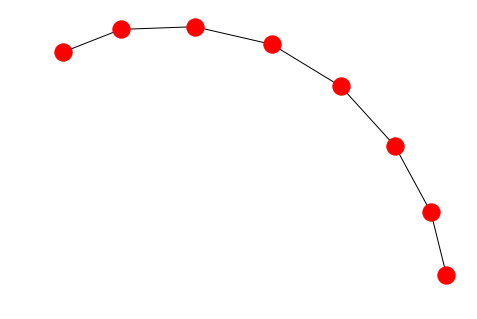

In [15]:
nx.draw(nx.Graph(connection_2))

In [16]:
nagivator_bfs(0, 7, connection_2)

standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 5 Looking forward [0, 6]
standing on 2 Looking forward [1, 3]
standing on 6 Looking forward [5, 7]
standing on 3 Looking forward [2, 4]
standing on 7 Looking forward [6]
standing on 4 Looking forward [3]


In [17]:
nagivator_dfs(0, 7, connection_2)

standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 2 Looking forward [1, 3]
standing on 3 Looking forward [2, 4]
standing on 4 Looking forward [3]
standing on 5 Looking forward [0, 6]
standing on 6 Looking forward [5, 7]
standing on 7 Looking forward [6]


## Sentence Generation

In [18]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [19]:
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'):
        line = line.strip()
        if not line: continue
            
        target, rules = line.split(sep)
        
        grammar[target.strip()] = [r.strip().split() for r in rules.split('|')]
    
    return grammar        

In [20]:
parsed = parse_grammar(grammar)
parsed

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [21]:
import random

def gene(grammar_parsed, target='sentence'):
    if target not in grammar_parsed: return target
    
    rule = random.choice(grammar_parsed[target])
    
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r!='null')

In [22]:
r = random.choice(parsed['noun'])
r

['小猫']

In [23]:
r = random.choice(parsed['Adj*'])
r

['null']

In [24]:
gene(parsed)

'这个蓝色的小猫听着一个小小的篮球'

In [25]:
decimal_grammar = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | num num
op = + | - | * | /
"""

In [26]:
for i in range(10):
    print(gene(parse_grammar(decimal_grammar, sep='='), target='expression'))

9*5-07+0
7+3*8*1
2-3-0-5
5-5+43+7
2-2+1/6
4+6/2*81
5*8*0/2
0*3*9*8
1/7/2+3
86-5/1/9
